In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. EDA

In [2]:
data=pd.read_excel("/content/Email_Marketing_Campaign_Dataset_Rounded.xlsx")

In [3]:
data.head() #printing the first 5 rows

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1


In [4]:
data.isnull().sum() #checking the number of missing values in the data

,0
Customer_Age,0
Emails_Opened,0
Emails_Clicked,0
Purchase_History,0
Time_Spent_On_Website,0
Days_Since_Last_Open,0
Customer_Engagement_Score,0
Opened_Previous_Emails,0
Clicked_Previous_Emails,0
Device_Type,0


In [5]:
#no missing values

In [6]:
data.info() #summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [7]:
data.describe() #statistic of data

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.674000,4.654000,1.515000,1490.63990,4.901600,28.950000,69.578100,0.513000,0.518000,0.517000
std,9.797741,2.008561,0.966804,513.56673,1.985719,14.797448,15.375871,0.500081,0.499926,0.499961
min,2.000000,0.000000,0.000000,35.30000,-1.400000,0.000000,29.300000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,1.000000,1131.27500,3.600000,19.000000,58.700000,0.000000,0.000000,0.000000
50%,35.000000,5.000000,1.500000,1500.05000,5.000000,29.000000,69.150000,1.000000,1.000000,1.000000
75%,41.000000,6.000000,2.000000,1833.47500,6.300000,39.000000,80.500000,1.000000,1.000000,1.000000
max,73.000000,11.000000,5.000000,3121.50000,11.200000,76.000000,122.900000,1.000000,1.000000,1.000000


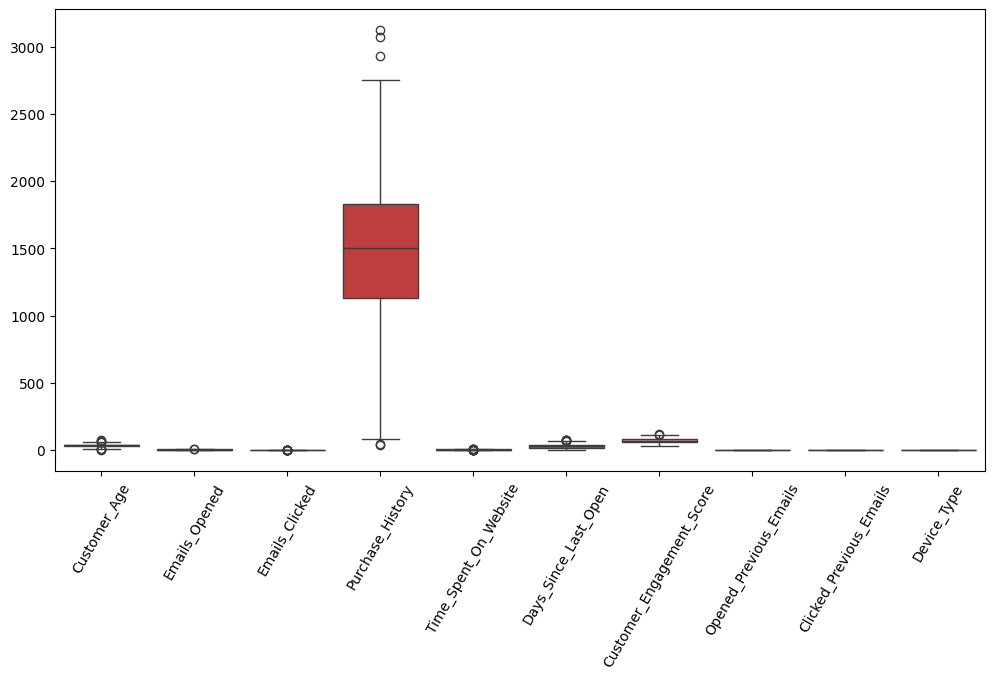

In [8]:
# outlier detection
#box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data)
plt.xticks(rotation=60)
plt.show()

In [9]:
numerical_columns=data.select_dtypes(include=['number']).columns
numerical_columns

Index(['Customer_Age', 'Emails_Opened', 'Emails_Clicked', 'Purchase_History',
       'Time_Spent_On_Website', 'Days_Since_Last_Open',
       'Customer_Engagement_Score', 'Opened_Previous_Emails',
       'Clicked_Previous_Emails', 'Device_Type'],
      dtype='object')

In [10]:
# outlier detection
def outlier_detection(df,colname): #creating function to finding outiers in each columns
    #calculate the Q1,Q3 and IQR
    q1=df[colname].quantile(0.25)
    q3=df[colname].quantile(0.75)
    iqr=q3-q1

    upper_extreme=q3+(1.5 * iqr)
    lower_extreme=q1-(1.5 * iqr)

    # Identify outliers
    outliers = df[(df[colname] < lower_extreme) | (df[colname] > upper_extreme)]


    return lower_extreme,upper_extreme,q1,q3,outliers


In [11]:
outlier_detection(data,'Purchase_History') #lower_extrem,upper_extreme,q1,q3,outliers of  'Purchase_History'

(77.97499999999968,
 2886.775,
 1131.2749999999999,
 1833.475,
      Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
 152            28              3               2              46.5   
 241            33              4               2            2934.2   
 454            29              6               2              35.3   
 716            36              5               2            3121.5   
 982            25              3               2            3076.0   
 
      Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
 152                    5.2                    37                       58.4   
 241                    6.8                    17                       55.9   
 454                    7.5                    44                       47.4   
 716                    9.8                    36                       85.7   
 982                    5.6                    59                       65.8   
 
      Opened_Previous_Email

In [12]:
#printing number of outliers in each columns
for col in numerical_columns:
    #calling the outlier detection function
    _,_,_,_, outliers=outlier_detection(data,col)

    print(f"Number of outliers in '{col}': {len(outliers)}")

Number of outliers in 'Customer_Age': 8
Number of outliers in 'Emails_Opened': 2
Number of outliers in 'Emails_Clicked': 19
Number of outliers in 'Purchase_History': 5
Number of outliers in 'Time_Spent_On_Website': 12
Number of outliers in 'Days_Since_Last_Open': 6
Number of outliers in 'Customer_Engagement_Score': 2
Number of outliers in 'Opened_Previous_Emails': 0
Number of outliers in 'Clicked_Previous_Emails': 0
Number of outliers in 'Device_Type': 0


In [13]:
#handling outliers by capping them
def handle_outliers(df,column):
    lower_extreme, upper_extreme,_,_,_=outlier_detection(data,column)
    df[column]=df[column].clip(lower=lower_extreme,upper=upper_extreme)
    #Any value less than the lower_extreme will be replaced by lower_extreme.
    #Any value greater than the upper_extreme will be replaced by upper_extreme.
    return df

for column in numerical_columns:
    data=handle_outliers(data,column)
    print(f"outliers replaced in the column :{column}")


outliers replaced in the column :Customer_Age
outliers replaced in the column :Emails_Opened
outliers replaced in the column :Emails_Clicked
outliers replaced in the column :Purchase_History
outliers replaced in the column :Time_Spent_On_Website
outliers replaced in the column :Days_Since_Last_Open
outliers replaced in the column :Customer_Engagement_Score
outliers replaced in the column :Opened_Previous_Emails
outliers replaced in the column :Clicked_Previous_Emails
outliers replaced in the column :Device_Type


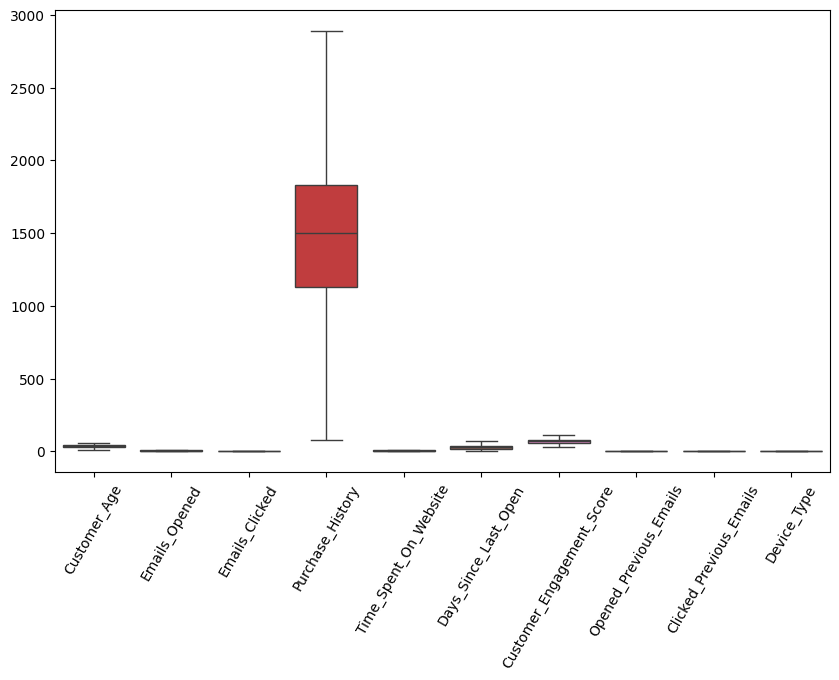

In [14]:
#plotting box plot

plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.xticks(rotation=60)
plt.show()

In [15]:
#outliers treated

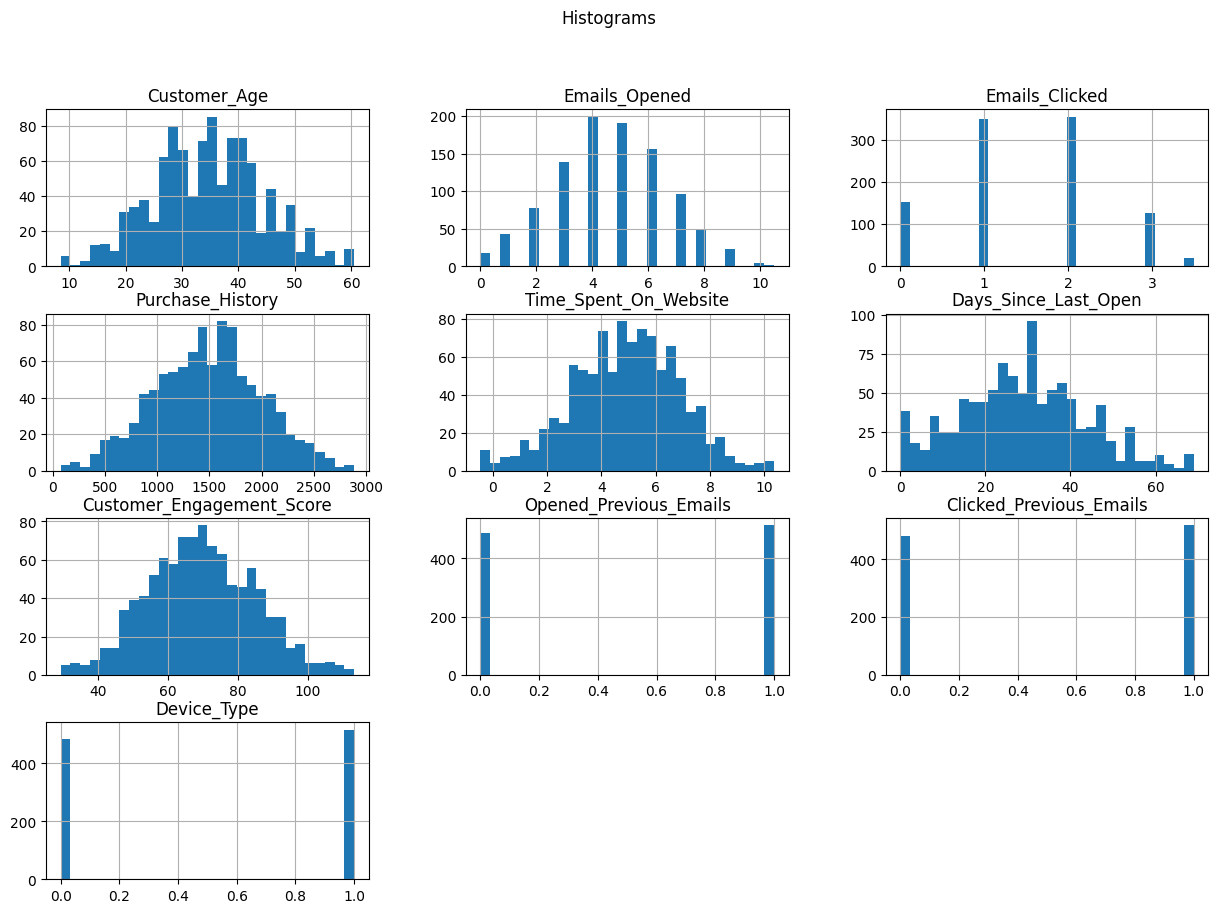

In [16]:
#visualization
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms')
plt.show()

<Axes: >

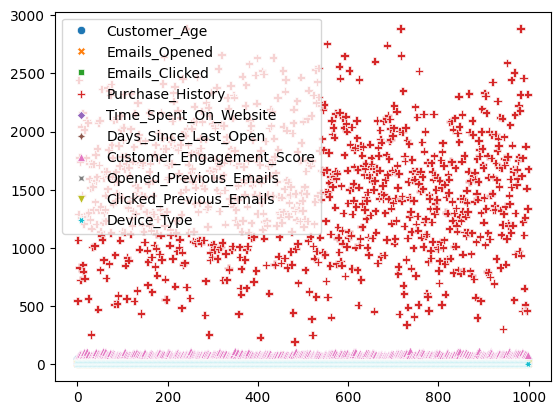

In [17]:
sns.scatterplot(data)

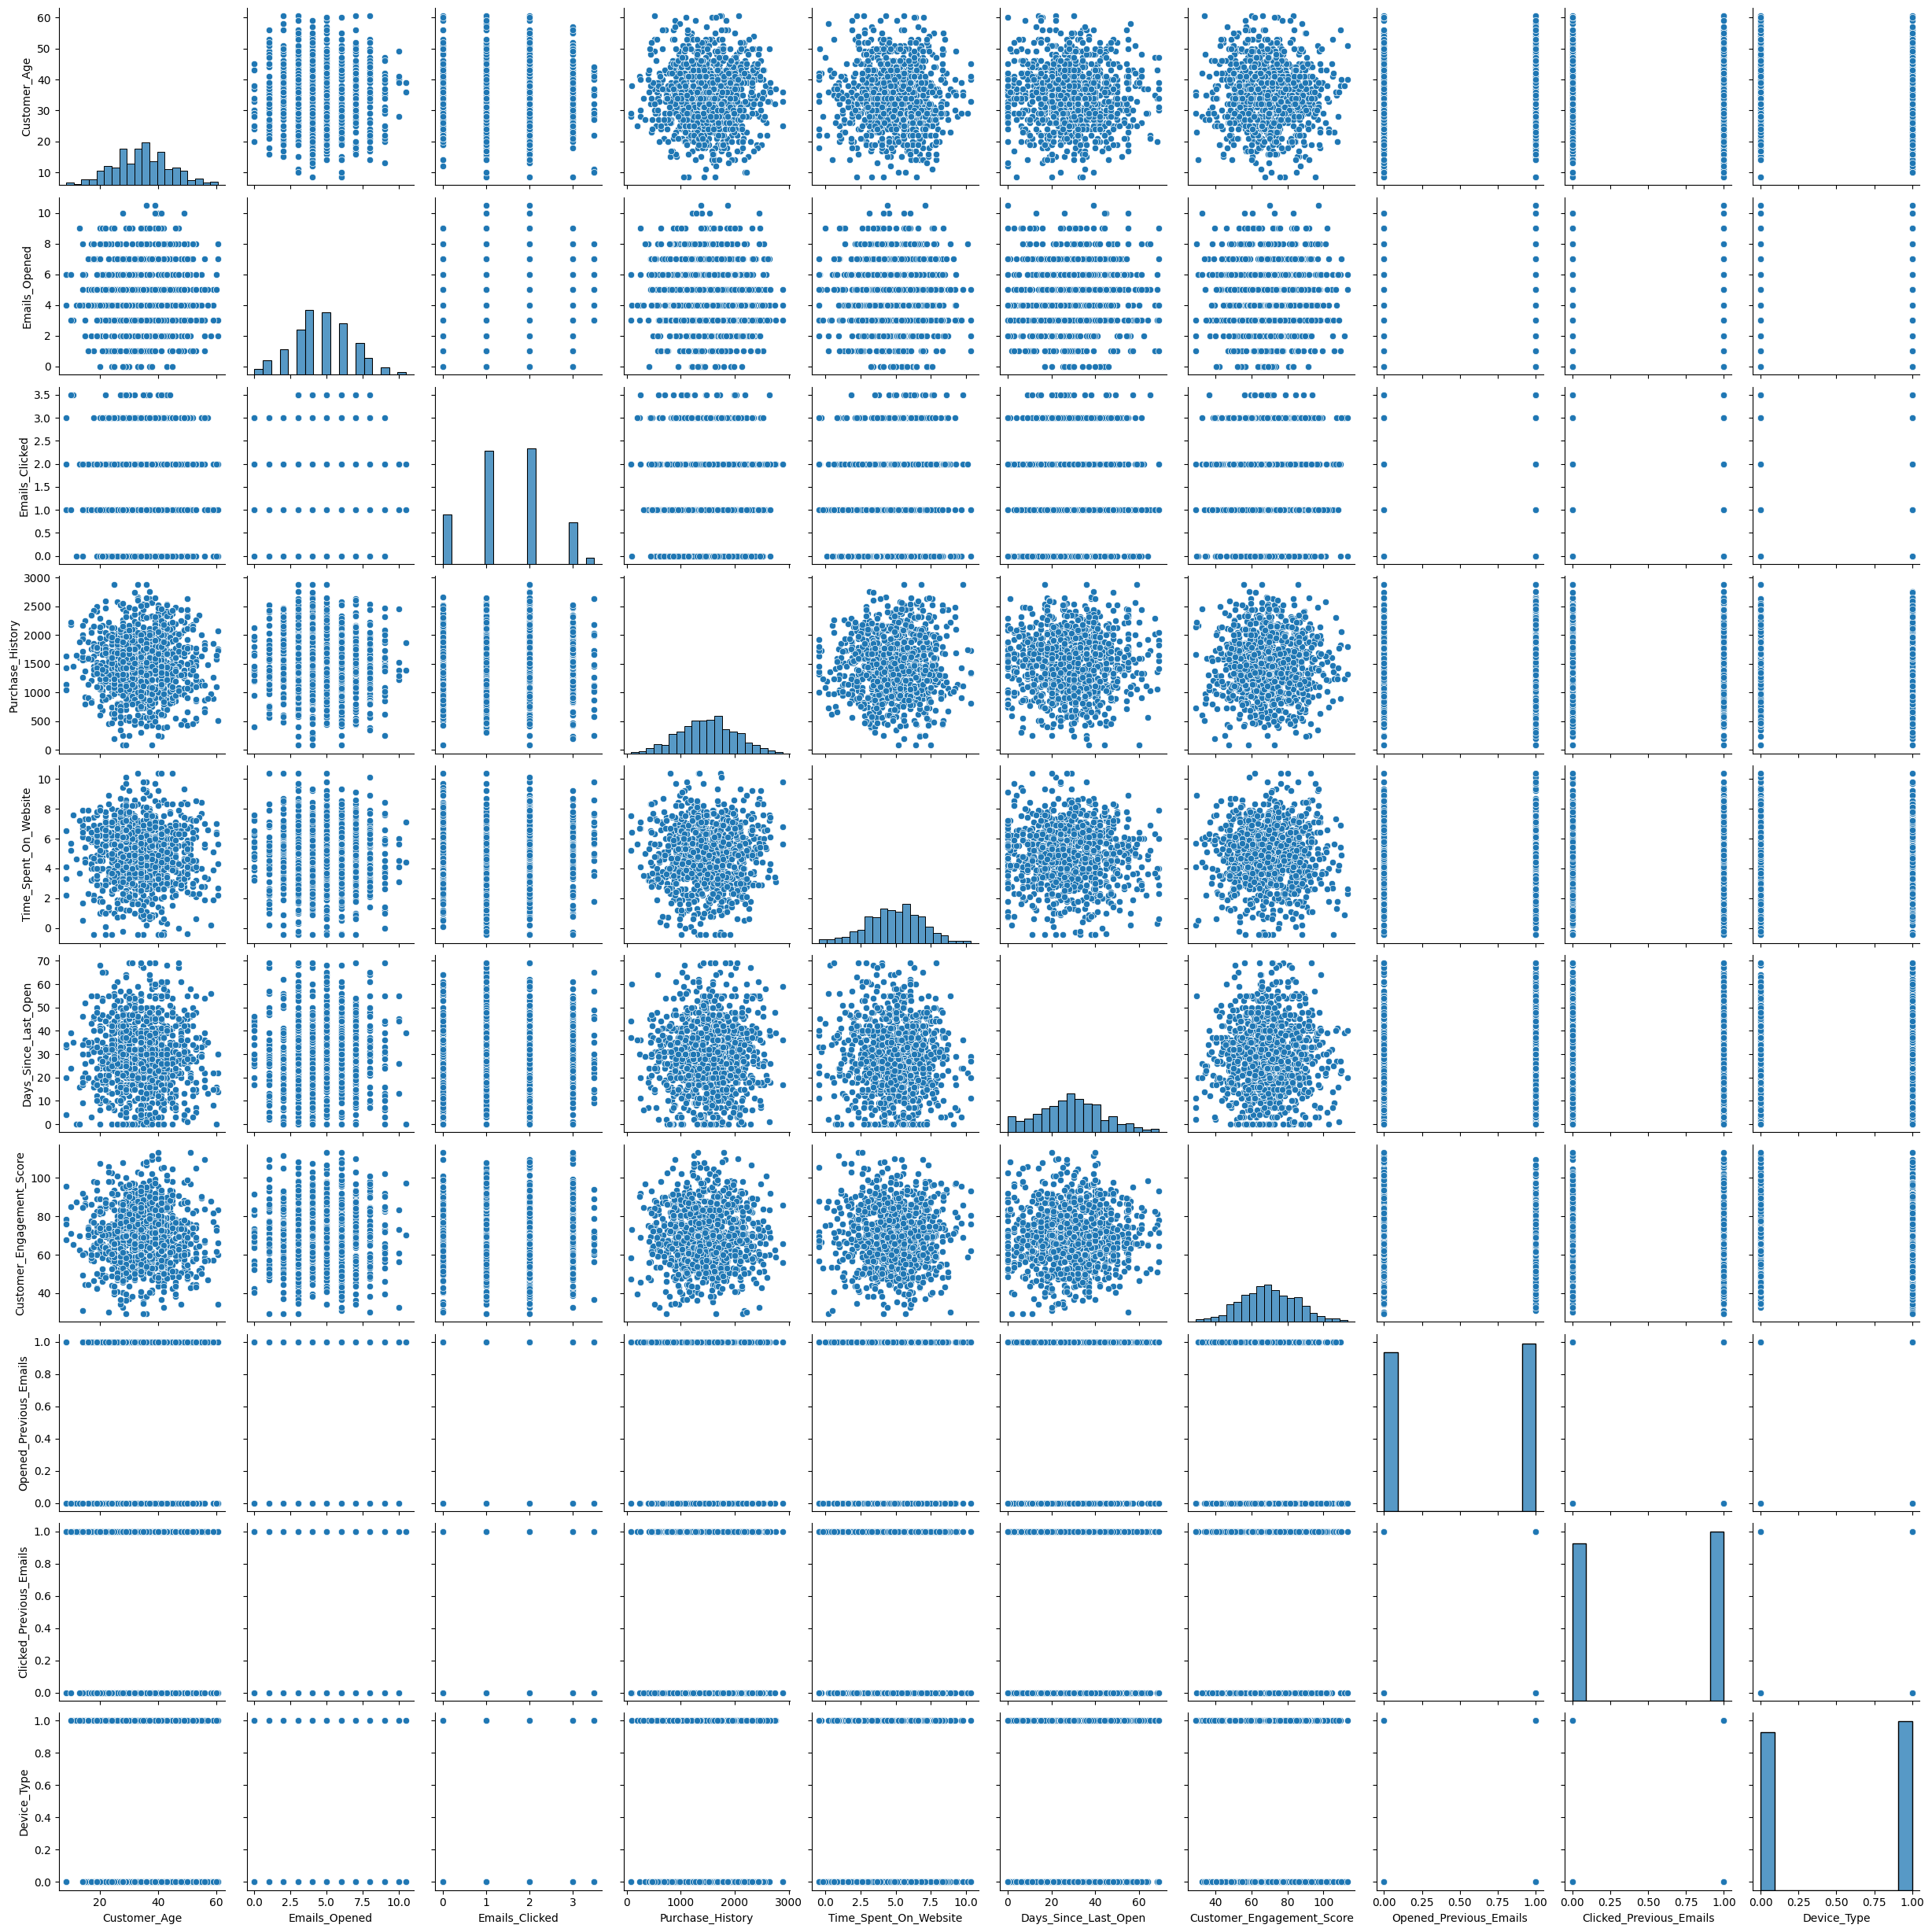

In [18]:
sns.pairplot(data)

In [19]:
correlation=data.corr(numeric_only=True)
correlation

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
Customer_Age,1.000000,-0.039841,0.027534,-0.015550,-0.029787,-0.005852,-0.032514,0.051694,-0.019258,-0.047459
Emails_Opened,-0.039841,1.000000,-0.001748,-0.050518,-0.010860,0.035035,-0.008487,-0.001985,-0.000254,-0.014077
Emails_Clicked,0.027534,-0.001748,1.000000,0.009227,0.027334,-0.003748,-0.030101,-0.032635,0.032414,-0.041210
Purchase_History,-0.015550,-0.050518,0.009227,1.000000,0.019552,0.031224,0.010701,0.037443,-0.035556,0.010940
Time_Spent_On_Website,-0.029787,-0.010860,0.027334,0.019552,1.000000,-0.044070,0.004445,0.015258,0.021806,0.019621
Days_Since_Last_Open,-0.005852,0.035035,-0.003748,0.031224,-0.044070,1.000000,0.013728,0.022827,-0.032854,-0.020220
Customer_Engagement_Score,-0.032514,-0.008487,-0.030101,0.010701,0.004445,0.013728,1.000000,-0.070617,-0.037274,-0.060764
Opened_Previous_Emails,0.051694,-0.001985,-0.032635,0.037443,0.015258,0.022827,-0.070617,1.000000,0.009073,0.039152
Clicked_Previous_Emails,-0.019258,-0.000254,0.032414,-0.035556,0.021806,-0.032854,-0.037274,0.009073,1.000000,-0.039272
Device_Type,-0.047459,-0.014077,-0.041210,0.010940,0.019621,-0.020220,-0.060764,0.039152,-0.039272,1.000000


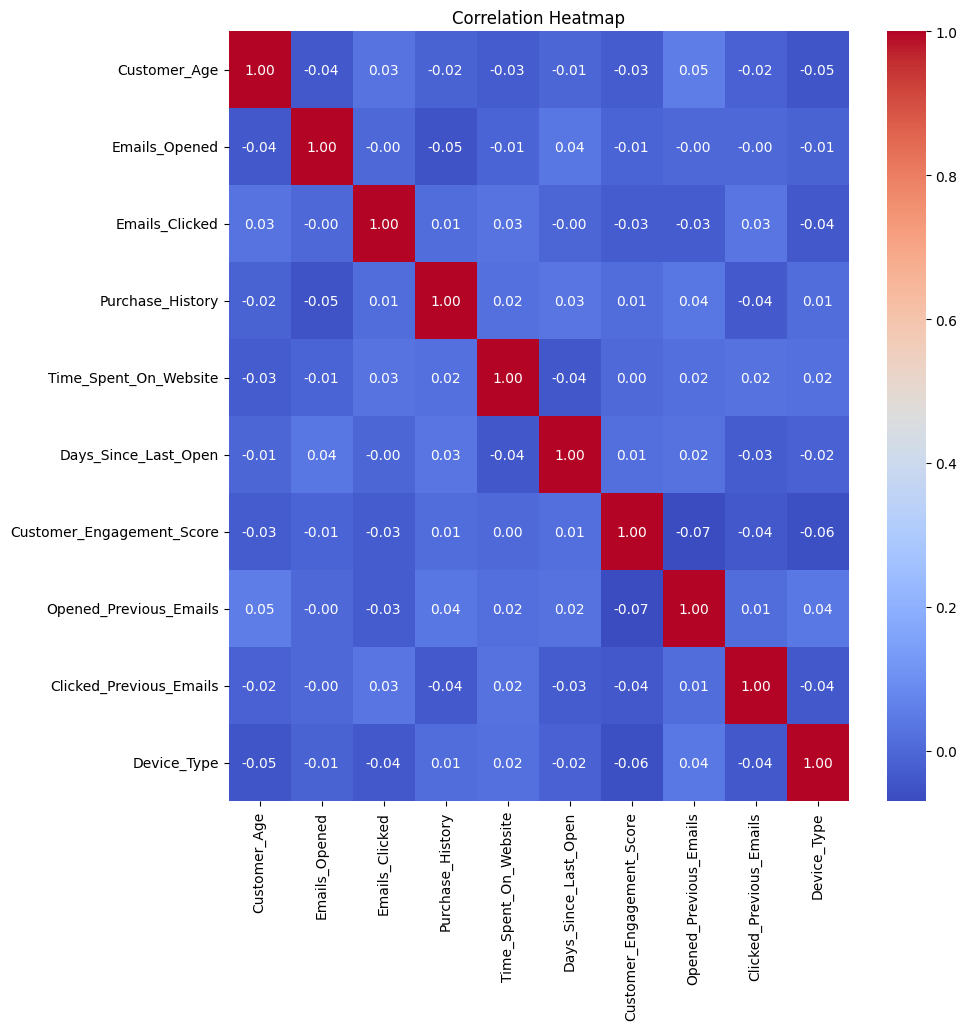

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 2. Model Bulding

In [21]:
# Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

#split the data in to features(x) and target(y=opened_previous_emails)
x=data.drop(columns=['Opened_Previous_Emails']) # all cols except target variable
y=data['Opened_Previous_Emails'] #target variable

In [22]:
from sklearn.utils import resample
x_bootstrapped,y_bootstrapped=resample(x,y,replace=True,n_samples=len(x)*2,random_state=42)

In [23]:
#split the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_bootstrapped,y_bootstrapped,test_size=0.3,random_state=42)
x_train.shape

(1400, 9)

In [24]:
y_train.shape

(1400,)

In [25]:
x_test.shape

(600, 9)

In [26]:
y_test.shape

(600,)

##  Random Forest Algorithm

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#initialize model
Model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model on training data
Model.fit(x_train,y_train)

#predict on test data
y_pred2=Model.predict(x_test)

In [28]:
y_pred2  #predicted data

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [29]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.8883333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       288
           1       0.88      0.90      0.89       312

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [30]:
input_data = (33,6,1,1069.8,4.9,23,60.5,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person did not open mail')
else:
  print('The person opened the mail')

[1]
The person opened the mail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Saving the trained model

In [31]:
import pickle

In [32]:
filename = 'trained_model1.sav'
pickle.dump(Model, open(filename, 'wb'))

In [33]:
# loading the saved model
loaded_model = pickle.load(open('trained_model1.sav', 'rb'))

In [34]:
input_data = (33,6,1,1069.8,4.9,23,60.5,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person did not open mail')
else:
  print('The person opened the mail')

[1]
The person opened the mail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
